## Marketing Campaign Analysis

# Objective

The goal of this notebook is to do an analysis of how effective the campaigns were and derive other insights using a publically available data set of a Facebook marketing campaign. The product being marketed is an app. "conversions" refer to installs of the app. "Interests" are assumed to be categorical (e.g. 1 might refer to an interest in someting, 17 would refer to an interest in something else)




## TL;DR Conclusion

Overall the campaigns do not seem to be doing the best job of getting people to click through. Despite low click through rates, the conversion rates are actually quite high which suggests that only people with a high level of interest are clicking through the app

Calculated KPIs below:


<img src='kpi_bar_charts.png' width='800' heioght='400'>

<img src='kpis.png'>

<img src='time.png' width='500' height='200'>

A regression analysis suggests that the most effective group to target will be females age 30-34. Because the campaigns as they were run weren't very effective in generating clicks, factors like the amount of money spent actually came up as being negatively correlated to the number of conversions. The level of concentrated interest (i.e. whether or not one of the three interests targeted was targeted twice in the same ad) does seem to be statistically insignificant. 

<img src='regression.png' width='700' height='150'>

Campaign 1178 had the most money spent. It was aimed at the male demographic exclusivly and had a higher percentage of ads targeted at older demographics than campigns 916 and 936 which were more effective. 

<img src='spent_by_gender.png' width='750' height='400' >

<img src='spent_by_age.png' width='750' height='400'>

<img src='Kpi_gender_age.png'>





<b>Reccomendation</b> : Allocate more money targeting the Female 30-34 and Female 35-39 demographics. Allocate more money to campaigns 916 and 936 and adjust campaign 1178 to consistently target a younger male audience. 



# Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image
from ipywidgets import interact 
import seaborn as sns
 



df = pd.read_csv("data.csv")


In [3]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


# Cleaning the Data

In [4]:
#Two columns of data are missing for some of these entries. The age column has been moved over and it is preventing
#the campaign_id column from being converted into integers. This  cell removes those entires from the data frame and 
#converts the campign_id column into integers

data = df[df.campaign_id != '40-44']

data = data[data.campaign_id != '45-49']

data = data[data.campaign_id != '35-39']

data = data[data.campaign_id != '30-34']

data.campaign_id = data.campaign_id.astype('int')

In [5]:
#This Cell turns the gender column into a dummy variable

data.gender.replace(['M','F'], [1,0], inplace= True)

In [6]:
#This cell creates a categorical variable for the age column. 3 = 30-34, 2 = 35-39 etc.

data["age_categorical"] = data.age

data.age_categorical.replace(['30-34', '35-39', '40-44', '45-49'], [3,2,1,0], inplace=True)



In [7]:
data.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical
0,708746,17/08/2017,17/08/2017,916,103916,30-34,1,15,17,17,7350.0,1,1.43,2.0,1.0,3
1,708749,17/08/2017,17/08/2017,916,103917,30-34,1,16,19,21,17861.0,2,1.82,2.0,0.0,3
2,708771,17/08/2017,17/08/2017,916,103920,30-34,1,20,25,22,693.0,0,0.00,1.0,0.0,3
3,708815,30/08/2017,30/08/2017,916,103928,30-34,1,28,32,32,4259.0,1,1.25,1.0,0.0,3
4,708818,17/08/2017,17/08/2017,916,103928,30-34,1,28,33,32,4133.0,1,1.29,1.0,1.0,3


In [8]:
#This Cell creates a function to determine whether the category variable appears in more than one 'interest' column

interest1 = data.interest1
interest2 = data.interest2
interest3 = data.interest3
    
column = []
def interest():
    count = 0
    while len(column) <= 760:
        if interest1.iloc[count] == interest2.iloc[count]:
            count += 1
            column.append(1)
        if interest1.iloc[count] == interest3.iloc[count]:
            count += 1
            column.append(1)
        if interest2.iloc[count] == interest3.iloc[count]:
            count += 1
            column.append(1)
        else:
            count += 1
            column.append(0)


In [9]:
#This cell adds the result of the interest function from the previous cell to the dataframe

print(interest())

column = pd.Series(column)

data["focused_interest"] = column

data.head()

None


,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,age_categorical,focused_interest
0,708746,17/08/2017,17/08/2017,916,103916,30-34,1,15,17,17,7350.0,1,1.43,2.0,1.0,3,1
1,708749,17/08/2017,17/08/2017,916,103917,30-34,1,16,19,21,17861.0,2,1.82,2.0,0.0,3,0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,1,20,25,22,693.0,0,0.00,1.0,0.0,3,0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,1,28,32,32,4259.0,1,1.25,1.0,0.0,3,1
4,708818,17/08/2017,17/08/2017,916,103928,30-34,1,28,33,32,4133.0,1,1.29,1.0,1.0,3,0


# Calculating and Graphing KPIs


In [58]:
#Creates a time series to graph data by date
dates = data

dates['date'] = pd.to_datetime(dates['reporting_end'])  # Makes sure your timestamp is in datetime format
dates_2 = dates.groupby(pd.Grouper(key='date', freq='D')).sum()

date_list = dates_2.index

dates_2['dates'] = date_list


Text(0.5, 1.0, 'Conversions with Spent and Clicks over time')

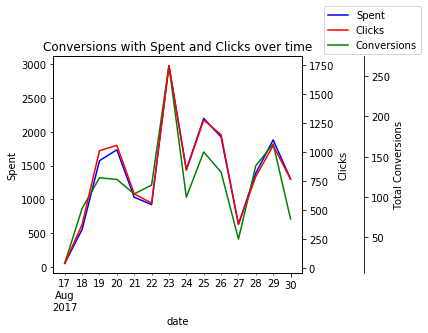

In [11]:

#Creates a graph with te data from the previous cell

fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

dates_2.spent.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
dates_2.clicks.plot(ax=ax, style='r-', secondary_y=True)
dates_2.total_conversion.plot(ax=ax3, style='g-') 

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0] , ax3.get_lines()[0]], ['Spent', 'Clicks', 'Conversions'], bbox_to_anchor=(1.50, 1.25))
ax3.set_ylabel('Total Conversions')
ax.set_ylabel('Spent')
ax.right_ax.set_ylabel("Clicks")
ax.set_title("Conversions with Spent and Clicks over time")


In [12]:
#Code for creating a table of KPI's based on a list of Dfs. 


# Takes a list of dataframes and returns a list of values
def kpi_names(df_list):
    totals = pd.DataFrame(columns=["spent", "total_conversion", "impressions", "clicks"])
    kpi_columns = ["spent", "total_conversion", "impressions", "clicks"]
    empty = []
    for df in df_list:
            for name in kpi_columns:
                empty.append(df[name].sum())
    
    return (empty)
    
#Takes the list from kpi_names function and creates a dataframe. User will have to type out to adjust the 'rows'
#line based on the number of dataframes in the input list

def kpi_arrange(numbers):
    totals = pd.DataFrame(columns=["spent", "total_conversion", "impressions", "clicks"])
    kpi_columns = ["spent", "total_conversion", "impressions", "clicks"]
    count = 0
    count_two = 0
    numbers = pd.Series(numbers)
    for row in kpi_columns:
            rows = (numbers[count], (numbers[count + 4]), (numbers[count + 8]), (numbers[count + 12] ), (numbers[count + 16]), (numbers[count + 20]), (numbers[count + 24]), (numbers[count + 28]), (numbers[count + 32]), (numbers[count + 36]) )
            count += 1
            totals[kpi_columns[count_two]] = rows
            count_two +=1 
    return (totals)

#Takes the dataframe from kpi_arrange and caluclates kpis based on the existing columns
def kpi_calculator(df):
    kpi_columns = ["spent", "total_conversion", "impressions", "clicks"]
    other_kpi = ["cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]
    count = 0
    for row in df:
        df[other_kpi[0]] = df[kpi_columns[0]] / df[kpi_columns[3]]
        df[other_kpi[1]] = df[kpi_columns[0]] / df[kpi_columns[2]]
        df[other_kpi[2]] = df[kpi_columns[0]] / df[kpi_columns[1]]
        df[other_kpi[3]] = df[kpi_columns[3]] / df[kpi_columns[2]]
        df[other_kpi[4]] = df[kpi_columns[1]] / df[kpi_columns[3]]
        return (df)

In [13]:
#list of dataframes for the KPI function

kpi_overall = data
kpi_male = data.query("gender == 1")
kpi_female = data.query("gender == 0")
kpi_campaign_916 = data.query("campaign_id == 916")
kpi_campaign_936 = data.query("campaign_id == 936")
kpi_campaign_1178 = data.query("campaign_id == 1178")
kpi_age_49 = data.query("age_categorical == 0")
kpi_age_44 = data.query("age_categorical == 1")
kpi_age_39 = data.query("age_categorical == 2")
kpi_age_34 = data.query("age_categorical == 3")

kpi_list = [kpi_overall, kpi_male, kpi_female, kpi_campaign_916, kpi_campaign_936, kpi_campaign_1178, kpi_age_49, kpi_age_44, kpi_age_39, kpi_age_34]

In [14]:
#running the functions

one = kpi_names(kpi_list)

two = kpi_arrange(one)

kpi_calculation = kpi_calculator(two)

In [15]:
#This section creates a dataframe with relevant kpi's and labels the columns
kpi_rows= ['Overall', 'Male Demo', 'Female Demo', 'Campaign 916', 'Campaign 936', 'Campaign 1178', 'Age 45-49', 'Age 40-44', 'Age 35-39',  'Age 30-34']

column_names = ["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

all_kpi = pd.concat(kpi_list)
       
kpi_calculation.reset_index(drop=True, inplace=True)      


kpi_calculation["Segment"] = kpi_rows

kpi_calculation = kpi_calculation[["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]]

kpi_calculation

,Segment,spent,total_conversion,impressions,clicks,cost per click,cost per impression,cost per conversion,click through rate,conversion rate
0,Overall,19620.239997,1645.0,78513588.0,11674.0,1.680678,0.000250,11.927198,0.000149,0.140911
1,Male Demo,17170.029999,1323.0,72026301.0,9989.0,1.718894,0.000238,12.978103,0.000139,0.132446
2,Female Demo,2450.209999,322.0,6487287.0,1685.0,1.454131,0.000378,7.609348,0.000260,0.191098
3,Campaign 916,149.710001,58.0,482925.0,113.0,1.324867,0.000310,2.581207,0.000234,0.513274
4,Campaign 936,2893.369999,537.0,8128187.0,1984.0,1.458352,0.000356,5.388026,0.000244,0.270665
5,Campaign 1178,16577.159998,1050.0,69902476.0,9577.0,1.730935,0.000237,15.787771,0.000137,0.109638
6,Age 45-49,2443.870000,163.0,6788029.0,1576.0,1.550679,0.000360,14.993067,0.000232,0.103426
7,Age 40-44,4337.629999,235.0,15881589.0,2660.0,1.630688,0.000273,18.458000,0.000167,0.088346
8,Age 35-39,5145.520004,357.0,20165377.0,3005.0,1.712319,0.000255,14.413221,0.000149,0.118802
9,Age 30-34,7693.219994,890.0,35678593.0,4433.0,1.735443,0.000216,8.644067,0.000124,0.200767


In [16]:
#crearting some graphs

dboard_names = ["Segment", "spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

@interact(hue=["spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"])
def plot(hue):
    _ = sns.pairplot(kpi_calculation,
                     x_vars = hue ,
                     y_vars = ["Segment", "total_conversion"],
                     hue = hue
                    )


interactive(children=(Dropdown(description='hue', options=('spent', 'impressions', 'clicks', 'cost per click',…

Text(0.5, 1.0, 'Percent of ads targeted by Gender')

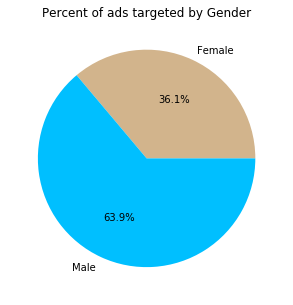

In [17]:
#pie chart for number of ads targeted by gender
sizes = [len(data.query("gender == 0")) , len(data.query("gender == 1"))]
labels = [ "Female", "Male"]

colors = ['tan', 'deepskyblue']

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))
plt.pie(sizes,  labels = labels, autopct='%1.1f%%', colors=colors)
ax.set_title("Percent of ads targeted by Gender")

Text(0.5, 1.0, 'Percent of Total Money Spent by campaign')

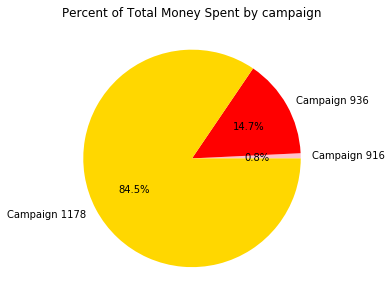

In [18]:
#Pie chart for total money spent by campaign
sizes_two = [kpi_campaign_916.spent.sum() , kpi_campaign_936.spent.sum(), kpi_campaign_1178.spent.sum() ]
labels_two = ["Campaign 916", "Campaign 936", "Campaign 1178"]

colors = ['pink','r','gold']

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))
plt.pie(sizes_two,  labels = labels_two, autopct='%1.1f%%', colors=colors)
ax.set_title("Percent of Total Money Spent by campaign")


Text(0.5, 1.0, 'Percent of Total Money Spent by Gender')

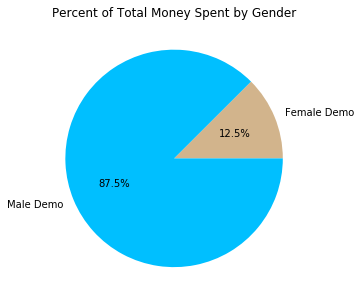

In [19]:
#Pie chart for total money spent by gender
sizes_three = [data.query("gender == 0").spent.sum(), data.query("gender == 1").spent.sum()]
labels_three = ["Female Demo", "Male Demo"]
colors = ['tan', 'deepskyblue']

fig, ax = plt.subplots(figsize=(8,5), subplot_kw=dict(aspect="equal"))
plt.pie(sizes_three, labels=labels_three, autopct='%1.1f%%', colors=colors)
ax.set_title("Percent of Total Money Spent by Gender")

In [61]:
#creates a dataframe to graph a bar chart in the next cell

raw_data = {'campaign_id': ['916', '936', '1178'],
            'Age 30-34': [kpi_campaign_916.query("age_categorical == 3").spent.sum(), kpi_campaign_936.query("age_categorical == 3").spent.sum(), kpi_campaign_1178.query("age_categorical == 3").spent.sum()],  
        'Age 35-39': [kpi_campaign_916.query("age_categorical == 2").spent.sum(), kpi_campaign_936.query("age_categorical == 2").spent.sum(), kpi_campaign_1178.query("age_categorical == 2").spent.sum()],
        'Age 40-44': [kpi_campaign_916.query("age_categorical == 1").spent.sum(), kpi_campaign_936.query("age_categorical == 1").spent.sum(), kpi_campaign_1178.query("age_categorical == 1").spent.sum()],
        'Age 45-49': [kpi_campaign_916.query("age_categorical == 0").spent.sum(), kpi_campaign_936.query("age_categorical == 0").spent.sum(), kpi_campaign_1178.query("age_categorical == 0").spent.sum()]
                   }

df = pd.DataFrame(raw_data, columns = ['campaign_id', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49'])

df

,campaign_id,Age 30-34,Age 35-39,Age 40-44,Age 45-49
0,916,75.330000,23.640000,16.810000,33.930000
1,936,391.440000,383.430001,450.400000,1668.099997
2,1178,7226.449993,4738.450003,3870.419999,741.840003


Text(0.5, 0, 'Campaign Id')

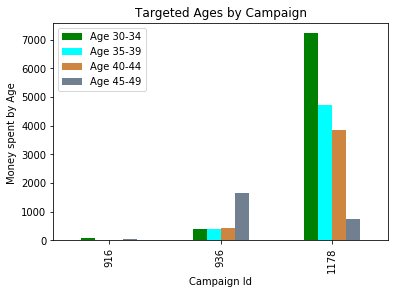

In [21]:
#uses data from previous cell to bar graph

colors = ['green', 'aqua', 'peru', 'slategrey']

df.plot(x="campaign_id", y=["Age 30-34", "Age 35-39", "Age 40-44", "Age 45-49"], kind="bar", color=colors)
plt.title('Targeted Ages by Campaign')
plt.ylabel('Money spent by Age ')
plt.xlabel('Campaign Id')

Text(0.5, 0, 'Campaign Id')

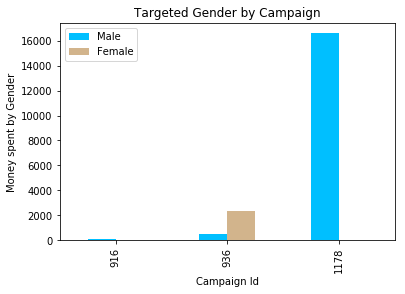

In [22]:
#creates a bar graph similar to above

raw_data = {'campaign_id': ['916', '936', '1178'],
            'Male': [kpi_campaign_916.query("gender == 1").spent.sum(), kpi_campaign_936.query("gender == 1").spent.sum(), kpi_campaign_1178.query("gender == 1").spent.sum()],  
        'Female': [kpi_campaign_916.query("gender == 0").spent.sum(), kpi_campaign_936.query("gender == 0").spent.sum(), kpi_campaign_1178.query("gender == 0").spent.sum()],
                   }

colors = ['deepskyblue', 'tan']

df2 =  pd.DataFrame(raw_data, columns = ['campaign_id', 'Male', 'Female'])

df2[['campaign_id', 'Male', 'Female']].plot(x="campaign_id", kind="bar", color=colors)

plt.title('Targeted Gender by Campaign')
plt.ylabel('Money spent by Gender')
plt.xlabel('Campaign Id')

Text(0.5, 1.0, 'Cost Per Click')

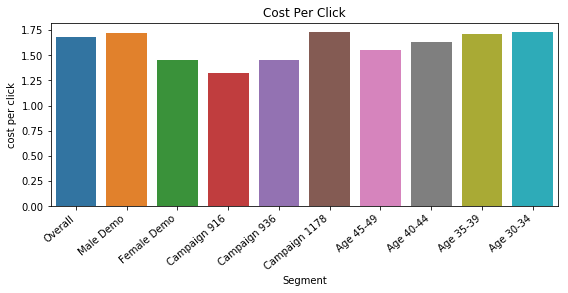

In [53]:
#graphing KPis

plt.figure(figsize=(8,4))
ax = sns.barplot(x="Segment", y="cost per click", data=kpi_calculation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Cost Per Click')


Text(0.5, 1.0, 'Cost per Conversion in dollars')

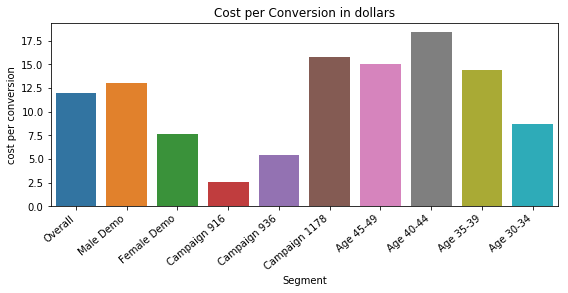

In [57]:
#graphing KPis

plt.figure(figsize=(8,4))
ax = sns.barplot(x="Segment", y="cost per conversion", data=kpi_calculation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Cost per Conversion in dollars')

Text(0.5, 1.0, 'Conversion Rate')

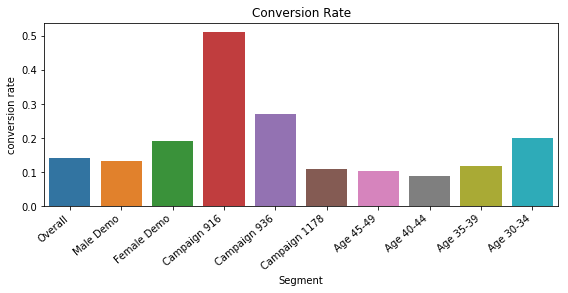

In [55]:
#graphing KPis

plt.figure(figsize=(8,4))
ax = sns.barplot(x="Segment", y="conversion rate", data=kpi_calculation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Conversion Rate')

Text(0.5, 1.0, 'Click Through Rate')

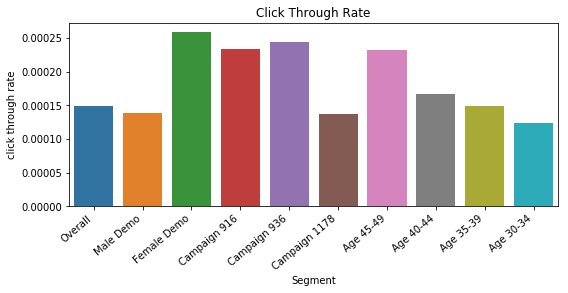

In [56]:
#graphing KPis

plt.figure(figsize=(8,4))
ax = sns.barplot(x="Segment", y="click through rate", data=kpi_calculation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Click Through Rate')

In [24]:
#creates a list of dataframes to calulate KPIs

kpi_female_34 = kpi_female.query("age_categorical == 3")
kpi_female_39 = kpi_female.query("age_categorical == 2")
kpi_female_44 = kpi_female.query("age_categorical == 1")
kpi_female_49 = kpi_female.query("age_categorical == 0")
kpi_male_34 = kpi_male.query("age_categorical == 3")
kpi_male_39 = kpi_male.query("age_categorical == 2")
kpi_male_44 = kpi_male.query("age_categorical == 1")
kpi_male_49 = kpi_male.query("age_categorical == 0")
kpi_focused_interest = data.query("focused_interest == 1")
kpi_unfocused_interest = data.query("focused_interest == 0")

kpi_list_two = [kpi_female_34, kpi_female_39, kpi_female_44, kpi_female_49, kpi_male_34, kpi_male_39, kpi_male_44, kpi_male_49, kpi_focused_interest, kpi_unfocused_interest]



In [25]:
#runs the KPi calulator functions

four = kpi_names(kpi_list_two)

five = kpi_arrange(four)

kpi_calculation_two = kpi_calculator(five)



In [59]:
#creates a dataframe and labels it 

kpi_rows_two = ['Female 30-34', 'Female 35-39', 'Female 40-44', 'Female 45-49', 'Male 30-34', 'Male 35-39', 'Male 40-44', 'Male 45-49', 'Focused interests',  'Unfocused interests']

column_names = ["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

kpi_two = pd.concat(kpi_list_two)
       
kpi_calculation_two.reset_index(drop=True, inplace=True)      


kpi_calculation_two["Segment"] = kpi_rows_two

kpi_calculation_two = kpi_calculation_two[["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]]


In [27]:
#creates more graphs

dboard_names = ["Segment", "spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

@interact(hue=["spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"])
def plot(hue):
    _ = sns.pairplot(kpi_calculation_two,
                     x_vars = hue ,
                     y_vars = ["Segment", "total_conversion"],
                     hue = hue
                    )

interactive(children=(Dropdown(description='hue', options=('spent', 'impressions', 'clicks', 'cost per click',…

In [28]:


kpi_916_m = kpi_campaign_916.query("gender == 1")
kpi_916_f = kpi_campaign_916.query("gender == 0")
kpi_916_focused = kpi_campaign_916.query("focused_interest == 1")
kpi_916_unfocused = kpi_campaign_916.query("focused_interest == 0")
kpi_936_m = kpi_campaign_936.query("gender == 1")
kpi_936_f = kpi_campaign_936.query("gender == 0")
kpi_936_focused = kpi_campaign_936.query("focused_interest == 1")
kpi_936_unfocused = kpi_campaign_936.query("focused_interest == 0")
kpi_1178_m = kpi_campaign_1178.query("gender == 1")
kpi_1178_f = kpi_campaign_1178.query("gender == 0")
kpi_1178_focused = kpi_campaign_1178.query("focused_interest == 1")
kpi_1178_unfocused = kpi_campaign_1178.query("focused_interest == 0")

kpi_list_three = [kpi_916_m , kpi_916_f, kpi_916_focused, kpi_916_unfocused, kpi_936_m, kpi_936_f, kpi_936_focused, kpi_936_unfocused, kpi_1178_m, kpi_1178_f, kpi_1178_focused, kpi_1178_unfocused ]

In [29]:
#Function needs to be updated to accomodate 12 dataframes instead of 10

def kpi_arrange(numbers):
    totals = pd.DataFrame(columns=["spent", "total_conversion", "impressions", "clicks"])
    kpi_columns = ["spent", "total_conversion", "impressions", "clicks"]
    count = 0
    count_two = 0
    numbers = pd.Series(numbers)
    for row in kpi_columns:
            rows = (numbers[count], (numbers[count + 4]), (numbers[count + 8]), (numbers[count + 12] ), (numbers[count + 16]), (numbers[count + 20]), (numbers[count + 24]), (numbers[count + 28]), (numbers[count + 32]), (numbers[count + 36]), (numbers[count + 40]), (numbers[count + 44]) )
            count += 1
            totals[kpi_columns[count_two]] = rows
            count_two +=1 
    return (totals)




kpis_gender_campaign = kpi_names(kpi_list_three)

kpis_gender_campaign = kpi_arrange(kpis_gender_campaign)

kpi_calculation_three = kpi_calculator(kpis_gender_campaign)



In [30]:
kpi_rows_three = ["Campiagn 916 Male Demo", "Campiagn 916 Female Demo", "Campaign 916 Focused Interest", "Campaign 916 Unfocused Interest", "Campiagn 936 Male Demo", "Campiagn 936 Female Demo", "Campaign 936 Focused Interest", "Campaign 936 Unfocused Interest", "Campiagn 1176 Male Demo",  "Campiagn 1176 Female Demo", "Campaign 1176 Unfocused Interest", "Campaign 1176 Unfocused Interest"]

column_names = ["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

kpi_three = pd.concat(kpi_list_three)
       
kpi_calculation_three.reset_index(drop=True, inplace=True)      


kpi_calculation_three["Segment"] = kpi_rows_three

kpi_calculation_three = kpi_calculation_three[["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]]



In [31]:
dboard_names = ["Segment", "spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

@interact(hue=["spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"])
def plot(hue):
    _ = sns.pairplot(kpi_calculation_three,
                     x_vars = hue ,
                     y_vars = ["Segment", "total_conversion"],
                     hue = hue
                    )

interactive(children=(Dropdown(description='hue', options=('spent', 'impressions', 'clicks', 'cost per click',…

In [32]:
kpi_916_34 = kpi_campaign_916.query("age_categorical == 3")
kpi_916_39 = kpi_campaign_916.query("age_categorical == 2")
kpi_916_44 = kpi_campaign_916.query("age_categorical == 1")
kpi_916_49 = kpi_campaign_916.query("age_categorical == 0")
kpi_936_34 = kpi_campaign_936.query("age_categorical == 3")
kpi_936_39 = kpi_campaign_936.query("age_categorical == 2")
kpi_936_44 = kpi_campaign_936.query("age_categorical == 1")
kpi_936_49 = kpi_campaign_936.query("age_categorical == 0")
kpi_1178_34 = kpi_campaign_1178.query("age_categorical == 3")
kpi_1178_39 = kpi_campaign_1178.query("age_categorical == 2")
kpi_1178_44 = kpi_campaign_1178.query("age_categorical == 1")
kpi_1178_49 = kpi_campaign_1178.query("age_categorical == 0")

kpi_list_four = [kpi_916_34, kpi_916_39, kpi_916_44, kpi_916_49, kpi_936_34,kpi_936_39, kpi_936_44, kpi_936_49, kpi_1178_34, kpi_1178_39,kpi_1178_44, kpi_1178_49]

In [33]:
kpis_campaign_by_age = kpi_names(kpi_list_four)

kpis_campaign_by_age = kpi_arrange(kpis_campaign_by_age)

kpi_calculation_four = kpi_calculator(kpis_campaign_by_age)





In [34]:
kpi_rows_four = ["Campiagn 916 Age 30-34", "Campiagn 916 Age 35-39", "Campaign 916 Age 40-44", "Campaign 916 Age 45-49", "Campiagn 936 Age 30-34", "Campiagn 936 Age 35-39", "Campaign 936 Age 40-44", "Campaign 936 Age 45-49", "Campaign 1176 Age 30-34",  "Campiagn 1176 Age 35-39", "Campaign 1176 Age 40-44", "Campaign 1176 Age 45-49"]

column_names = ["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

kpi_three = pd.concat(kpi_list_four)
       
kpi_calculation_four.reset_index(drop=True, inplace=True)      


kpi_calculation_four["Segment"] = kpi_rows_four

kpi_calculation_four = kpi_calculation_four[["Segment", "spent", "total_conversion", "impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]]


In [60]:
#creates more graphs

dboard_names = ["Segment", "spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"]

@interact(hue=["spent","impressions", "clicks", "cost per click", "cost per impression", 'cost per conversion', "click through rate", "conversion rate"])
def plot(hue):
    _ = sns.pairplot(kpi_calculation_four,
                     x_vars = hue ,
                     y_vars = ["Segment", "total_conversion"],
                     hue = hue
                    )


interactive(children=(Dropdown(description='hue', options=('spent', 'impressions', 'clicks', 'cost per click',…

# Regression Analysis


In [36]:
#This cell runs a linear regression for all variables on their effect on total conversion

regression = sm.ols(formula = "total_conversion ~ impressions + clicks + spent + gender + focused_interest + age_categorical", data = data).fit()

regression.params

Intercept           0.994988
impressions         0.000031
clicks             -0.049620
spent              -0.042649
gender             -0.495693
focused_interest    0.035199
age_categorical     0.071790
dtype: float64

In [37]:
#This cell displays the summary of the regression
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_conversion   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     632.9
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          2.28e-290
Time:                        19:04:46   Log-Likelihood:                -1462.0
No. Observations:                 761   AIC:                             2938.
Df Residuals:                     754   BIC:                             2970.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9950      0.151      6.574      0.000       0.698       1.292
impressions       3.101e-05   1.44e-06     21.520      0.000    2.82e-05    3.38e-05
clicks              -0.0496      0.029     -1.706      0.088      -0.107       0.007
spent               -0.0426      0.020     -2.144      0.032      -0.082      -0.004
gender              -0.4957      0.131     -3.789      0.000      -0.753      -0.239
focused_interest     0.0352      0.169      0.208      0.835      -0.297       0.367
age_categorical      0.0718      0.058      1.236      0.217      -0.042       0.186
==============================================================================
Omnibus:                      452.318   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20141.205
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      27.884   Cond. No.                     7.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Dummy variable created for Focused interest appears to be insignificant. The R squared value is pretty so tis model model works farily well. 

In [38]:
#creates a dataframe that can be used to predict values from the regression model

reg_x_test = pd.DataFrame({'impressions': [data.impressions.min(), data.impressions.max()],
                           'clicks': [data.clicks.min(), data.clicks.max()], 
                           'spent' : [data.spent.min(), data.spent.max()],
                           'gender' : [data.gender.min(), data.gender.max()] ,
                           'focused_interest' : [data.focused_interest.min(), data.focused_interest.max()],
                          'age_categorical' : [data.age_categorical.min(), data.focused_interest.max()]})




In [39]:
#This cell creates a dataframe that can be used to plot the trendline for the regression
#Impressions is used as the X-value as it appears to have te bioggest impact on total conversions

#predicts the values
preds = regression.predict(reg_x_test)


#assigns te values from the prediction and the other variables for graphing purposes
y_value = pd.DataFrame({'conversion_prediction':[preds.min(), preds.max()],
                        'total_conversion':[data.total_conversion.min(), data.total_conversion.max()],
                       'impressions': [data.impressions.min(), data.impressions.max()],
                       'clicks': [data.clicks.min(), data.clicks.max()], 
                       'spent':[data.spent.min(), data.spent.max()]})


y_value

,clicks,conversion_prediction,impressions,spent,total_conversion
0,0,0.997686,87.0,0.000000,0.0
1,340,51.077028,3052003.0,639.949998,60.0


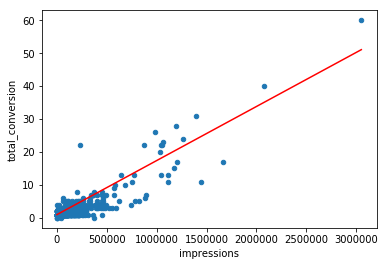

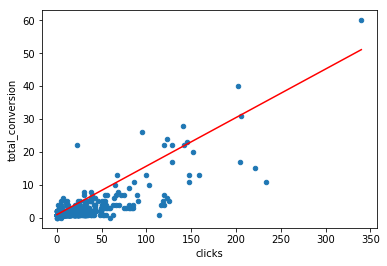

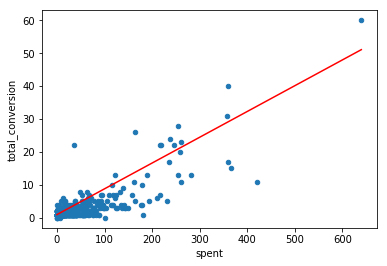

In [40]:
#This cell plots a trend line to three different variables

data.plot(kind='scatter', x='impressions', y='total_conversion')
plt.plot( y_value.impressions,y_value.conversion_prediction, c='red')


data.plot(kind='scatter', x='clicks', y='total_conversion')
plt.plot(y_value.clicks, y_value.conversion_prediction, c='red')


spent = data.plot(kind='scatter', x='spent', y='total_conversion')
plt.plot(y_value.spent, y_value.conversion_prediction, c='red')

# End Notes


The graphs in the Tl:dr conclusion were added via html after they had been calculated in the notebook below those cells. 


Data pulled from this source
https://www.kaggle.com/madislemsalu/facebook-ad-campaign